In [ ]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# get_config().InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [27]:
from math import sqrt
from timeit import timeit
from itertools import zip_longest
import matplotlib.pyplot as plt

With Eratosthenes' sieve, a number can be crossed out more than once. For instance, in case $n\geq 12$, 12 will be crossed out as a multiple of 2 and then as a multiple of 3. Euler's sieve works with a list of numbers initialised as the list of all numbers between 2 and $n$ that, at a given stage, has lost those of its members that have been found out not to be prime, and that eventually has lost all of its nonprime numbers.

Let us try the following, to find out that there is a flaw.

* The first member of the list contains 2; multiplying 2 with 2 and the following members of the list up to and excluding the first number greater than $\lfloor\frac{n}{2}\rfloor$, should remove all proper multiples of 2 at most equal to $n$.
* The next member of the resulting list should contain 3; multiplying 3 with 3 and the following members of the list up to and excluding the first number greater than $\lfloor\frac{n}{3}\rfloor$, should remove all proper multiples of 3 at most equal to $n$ that remain, namely, those that are not multiple of 2.
* The next member of the resulting list should contain 5; multiplying 5 with 5 and the following members of the list up to and excluding the first number greater than $\lfloor\frac{n}{5}\rfloor$ should remove all proper multiples of 5 at most equal to $n$ that remain, namely, those that are not multiples of 2 or 3...
* ...

For illustration purposes, let us fix $n$ to some value, assign that value to a variable `n`, and define `sieve` accordingly:

In [1]:
n = 25
sieve = list(range(2, n + 1))


In [2]:
def print_sieve_contents():
    for p in sieve:
        print(f'{p:3}', end='')
        
print_sieve_contents()

  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

To observe how, with `n` set to `25`, proper multiples of 2 are crossed out, we call the following function with `i` set to `0` as argument:

In [3]:
def eliminate_proper_multiples(i):
    print(f'Now eliminating proper multiples of {sieve[i]}')
    j = i
    while j < len(sieve):
        factor = sieve[i] * sieve[j]
        if factor <= n:
            print(f' Eliminating {sieve[i]} * {sieve[j]} = {factor}')
            sieve.remove(factor)
            j += 1
        else:
            break

In [4]:
eliminate_proper_multiples(0)
print_sieve_contents()

Now eliminating proper multiples of 2
 Eliminating 2 * 2 = 4
 Eliminating 2 * 3 = 6
 Eliminating 2 * 5 = 10
 Eliminating 2 * 7 = 14
 Eliminating 2 * 8 = 16
 Eliminating 2 * 9 = 18
 Eliminating 2 * 11 = 22
 Eliminating 2 * 12 = 24
  2  3  5  7  8  9 11 12 13 15 17 19 20 21 23 25

We see the flaw. Having first eliminated $2\times 2$, 4 is not longer in the list, which prevents 8 from being eliminated, and the same holds for other multiples of 2.

This suggests to, for an arbitrary value of $n$, amend the procedure as follows.

* using 2, the first number in the list:
    * remove $2^2$, $2^3$, $2^4$, ..., up to $2^r$ for the largest $r$ with $2^r\leq n$,
    * remove $2\times 3$, $2^2\times 3$, $2^3\times 3$, ..., up to $2^r\times 3$ for the largest $r$ with $2^r\times 3\leq n$,
    * as 4 is no longer in the list, remove $2\times 5$, $2^2\times 5$, $2^3\times 5$, ..., up to $2^r\times 5$ for the largest $r$ with $2^r\times 5\leq n$,
    * as 6 is no longer in the list, remove $2\times 7$, $2^2\times 7$, $2^3\times 7$, ..., up to $2^r\times 7$ for the largest $r$ with $2^r\times 7\leq n$,
    * as 8 is no longer in the list, remove $2\times 9$, $2^2\times 9$, $2^3\times 9$, ..., up to $2^r\times 9$ for the largest $r$ with $2^r\times 9\leq n$,
    * ...
* using 3, the next number in what remains of the list:
    * remove $3^2$, $3^3$, $3^4$, ..., up to $3^r$ for the largest $r$ with $3^r\leq n$,
    * as 4 is no longer in the list, remove $3\times 5$, $3^2\times 5$, $3^3\times 5$, ..., up to $3^r\times 5$ for the largest $r$ with $3^r\times 5\leq n$,
    * as 6 is no longer in the list, remove $3\times 7$, $3^2\times 7$, $3^3\times 7$, ..., up to $3^r\times 7$ for the largest $r$ with $3^r\times 7\leq n$,
    * as 8, 9 and 10 are no longer in the list, remove $3\times 11$, $3^2\times 11$, $3^3\times 11$, ...., up to $3^r\times 11$ for the largest $r$ with $3^r\times 11\leq n$,
    * ...
* ...

We stop when the next number in what remains in the list exceeds $\lfloor\sqrt{n}\rfloor$.

Let us verify that the procedure is correct. At stage $k$, all proper multiples of the $k$th prime number $p_k$ at most equal to $n$ are removed from the list. This is verified by induction. Indeed, if during stage $k$, a number $m$ in $\{2,3,\dots, n\}$ with $p_k m\leq n$ is not considered then:

* either $m$ is smaller than $p_k$, in which case it is a multiple of at least one of $p_1$, ..., $p_{k-1}$, which implies that $p_k\times m$ is also a multiple of at least one of $p_1$, ..., $p_{k-1}$, so by inductive hypothesis, $p_k\times m$ was removed from the list during one of the previous stages,
* or $m$ is greater than $p_k$ but no longer belongs to the list (it is a number such as 4, 6, 8 at stage 1, or a number such as 4, 6, 8, 9, 10 at stage 2), in which case:
    * either $m$ was removed during one of the previous stages, hence $m$ is a multiple of at least one of $p_1$, ..., $p_{k-1}$, which implies as in the previous case that $p_k\times m$ was also removed from the list, 
    * or $m$ is a multiple of $p_k$ which was removed earlier in the current stage, so $m$ is a number of the form $p_k^r m'$ for some $r\geq 1$ and some number $m'$ which was then found in what remained of the list, therefore $p_k m=p_k^{r+1}m'$ was also removed from the list earlier in the current stage.

To observe how, with `n` set to `25`, nonzero powers of 2 times 2, 3, 5, 7, 9 and 11, nonzero powers of 3 times 3, 5 and 7, and nonzero powers of 5 times 5 are eliminated, the following function is successively called with `i` set to `0` and `k` set to `0`, `1`, `2`, `3`, `4` and `5` as arguments, then with `i` set to `1` and `k` set to `0`, `1` and `2` as arguments, then with `i` set to `2` and `k` set to `0` as arguments:

In [5]:
def eliminate_proper_multiples(i, k):
    # We assume that this function will be called in the order
    #   eliminate_proper_multiples(0, 0)
    #   eliminate_proper_multiples(0, 1)
    #   ...
    #   eliminate_proper_multiples(1, 0)
    #   eliminate_proper_multiples(1, 1)
    #   ...
    print('Now eliminating multiples of the form a nonzero power of '
          f'{sieve[i]} times {sieve[i + k]}'
         )
    factor = sieve[i] * sieve[i + k]
    power = 1
    while factor <= n:
        print(f' Eliminating {sieve[i]}^{power} x {sieve[i + k]} = {factor}')
        sieve.remove(factor)
        factor *= sieve[i]
        power += 1

In [6]:
sieve = list(range(2, n + 1))
print_sieve_contents()

  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

In [7]:
eliminate_proper_multiples(0, 0)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 2
 Eliminating 2^1 x 2 = 4
 Eliminating 2^2 x 2 = 8
 Eliminating 2^3 x 2 = 16
  2  3  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25

In [8]:
eliminate_proper_multiples(0, 1)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 3
 Eliminating 2^1 x 3 = 6
 Eliminating 2^2 x 3 = 12
 Eliminating 2^3 x 3 = 24
  2  3  5  7  9 10 11 13 14 15 17 18 19 20 21 22 23 25

In [9]:
eliminate_proper_multiples(0, 2)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 5
 Eliminating 2^1 x 5 = 10
 Eliminating 2^2 x 5 = 20
  2  3  5  7  9 11 13 14 15 17 18 19 21 22 23 25

In [10]:
eliminate_proper_multiples(0, 3)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 7
 Eliminating 2^1 x 7 = 14
  2  3  5  7  9 11 13 15 17 18 19 21 22 23 25

In [11]:
eliminate_proper_multiples(0, 4)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 9
 Eliminating 2^1 x 9 = 18
  2  3  5  7  9 11 13 15 17 19 21 22 23 25

In [12]:
eliminate_proper_multiples(0, 5)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 11
 Eliminating 2^1 x 11 = 22
  2  3  5  7  9 11 13 15 17 19 21 23 25

In [13]:
eliminate_proper_multiples(1, 0)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 3 times 3
 Eliminating 3^1 x 3 = 9
  2  3  5  7 11 13 15 17 19 21 23 25

In [14]:
eliminate_proper_multiples(1, 1)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 3 times 5
 Eliminating 3^1 x 5 = 15
  2  3  5  7 11 13 17 19 21 23 25

In [15]:
eliminate_proper_multiples(1, 2)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 3 times 7
 Eliminating 3^1 x 7 = 21
  2  3  5  7 11 13 17 19 23 25

In [16]:
eliminate_proper_multiples(2, 0)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 5 times 5
 Eliminating 5^1 x 5 = 25
  2  3  5  7 11 13 17 19 23

To observe more synthetically how, with `n` set to `25`, proper multiples of 2, proper multiples of 3 that are not multiples of 2, and proper multiples of 5, equal to $\lfloor\sqrt 25\rfloor$, that are multiples of neither 2 nor 3, are eliminated, we successively call the following function with `i` set to `0`, `1` and `2` as argument:

In [17]:
def eliminate_proper_multiples(i):
    # We assume that this function will be called in the order
    #   eliminate_proper_multiples(0)
    #   eliminate_proper_multiples(1)
    #   eliminate_proper_multiples(2)
    #   ...
    k = 0
    while True:
        factor = sieve[i] * sieve[i + k]
        if factor > n:
            break
        print('Now eliminating multiples of the form '
              f'a nonzero power of {sieve[i]} times {sieve[i + k]}'
             )
        power = 1
        while factor <= n:
            print(' Eliminating '
                  f'{sieve[i]}^{power} x {sieve[i + k]} = {factor}'
                 )
            sieve.remove(factor)
            factor *= sieve[i]
            power += 1
        k += 1

In [18]:
sieve = list(range(2, n + 1))
print_sieve_contents()

  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

In [19]:
eliminate_proper_multiples(0)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 2 times 2
 Eliminating 2^1 x 2 = 4
 Eliminating 2^2 x 2 = 8
 Eliminating 2^3 x 2 = 16
Now eliminating multiples of the form a nonzero power of 2 times 3
 Eliminating 2^1 x 3 = 6
 Eliminating 2^2 x 3 = 12
 Eliminating 2^3 x 3 = 24
Now eliminating multiples of the form a nonzero power of 2 times 5
 Eliminating 2^1 x 5 = 10
 Eliminating 2^2 x 5 = 20
Now eliminating multiples of the form a nonzero power of 2 times 7
 Eliminating 2^1 x 7 = 14
Now eliminating multiples of the form a nonzero power of 2 times 9
 Eliminating 2^1 x 9 = 18
Now eliminating multiples of the form a nonzero power of 2 times 11
 Eliminating 2^1 x 11 = 22
  2  3  5  7  9 11 13 15 17 19 21 23 25

In [20]:
eliminate_proper_multiples(1)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 3 times 3
 Eliminating 3^1 x 3 = 9
Now eliminating multiples of the form a nonzero power of 3 times 5
 Eliminating 3^1 x 5 = 15
Now eliminating multiples of the form a nonzero power of 3 times 7
 Eliminating 3^1 x 7 = 21
  2  3  5  7 11 13 17 19 23 25

In [21]:
eliminate_proper_multiples(2)
print_sieve_contents()

Now eliminating multiples of the form a nonzero power of 5 times 5
 Eliminating 5^1 x 5 = 25
  2  3  5  7 11 13 17 19 23

Putting it all together:

In [22]:
def first_sieve_of_primes_up_to(n):
    sieve = list(range(2, n + 1))
    i = 0
    while sieve[i] <= round(sqrt(n)):
        k = 0
        while True:
            factor = sieve[i] * sieve[i + k]
            if factor > n:
                break
            while factor <= n:
                sieve.remove(factor)
                factor *= sieve[i]
            k += 1
        i += 1
    return sieve

We can reuse `nicely_display()` as defined in relation to Eratosthenes' sieve:

In [23]:
def nicely_display(sequence, max_size):
    field_width = max_size + 2
    nb_of_fields = 80 // field_width
    count = 0
    for e in sequence:
        print(f'{e:{field_width}}', end='')
        count += 1
        if count % nb_of_fields == 0:
            print()

`first_sieve_of_primes_up_to()` returns precisely the list of numbers that we want to display, so we make it the first argument of `nicely_display()`:

In [ ]:
primes = first_sieve_of_primes_up_to(1_000)
nicely_display(primes, len(str(primes[-1])))

Euler's sieve's algorithm is more complicated than Eratosthenes' sieve's algorithm, but much less effective: 

In [ ]:
timeit('first_sieve_of_primes_up_to(20_000)', globals=globals(), number=1)

To understand why, and try and address the inefficiency, let us examine the cost of performing some operations on lists and sets, by timing those operations and plotting collected data.

The `plot()` function from the `matplotlib.pyplot` module allows one to easily plot data. It expects two arguments: an enumerable of $x$-coordinates and an enumerable of $y$-coordinates. Usually, we rather have an enumerable of pairs, one for each point to plot, the first and second components of the pair being the point's $x$- and $y$-coordinates, respectively. For instance, from the function $f:x\mapsto 2x$, we could generate the list of points `[(0, 0), (1, 2), (3, 6), (4, 8), (9, 18)]`; `plot()` should then be given `[0, 1, 3, 4, 9]` as first argument, and `[0, 2, 6, 8, 18]` as second argument (or any other enumerable representing the same sequence of data). The `zip()` function makes it easy to get the latter two lists from the former list:

In [42]:
list(zip((0, 0), (1, 2), (3, 6), (4, 8), (9, 18)))

[(0, 1, 3, 4, 9), (0, 2, 6, 8, 18)]

More generally, `zip()` accepts arbitrary enumerables as arguments. The size of those enumerables can differ: what is zipped is the enumerables truncated if needed to the size of the shortest one:

In [41]:
list(zip(range(1, 5), [11, 12, 13], [21, 22, 23, 24, 25], (31, 32, 33)))

[(1, 11, 21, 31), (2, 12, 22, 32), (3, 13, 23, 33)]

Observe that `zip()` is self-inverse, after some of the arguments have possibly been truncated to the size of the shortest one:

In [28]:
list(zip(*zip((0, 0), (1, 2), (3, 6), (4, 8), (9, 18))))
list(zip(*zip(range(1, 5), [11, 12, 13], [21, 22, 23, 24, 25], (31, 32, 33))))

[(1, 2, 3), (11, 12, 13), (21, 22, 23), (31, 32, 33)]

In applications where one needs to extend the enumerables to the size of the longest sequence, then the `itertools` module comes to the rescue with the `zip_longest()` function, that accepts an optional `fillvalue` keyword only argument, set to `None` by default:

In [29]:
list(zip_longest([1], [11, 12], [21, 22, 23, 25], [31, 32]))
list(zip_longest([1], [11, 12], [21, 22, 23, 25], [31, 32], fillvalue=-1))

[(1, 11, 21, 31), (-1, 12, 22, 32), (-1, -1, 23, -1), (-1, -1, 25, -1)]

Let us first examine the relative cost of creating, from a given collection, a list versus a set:

(2.202000359829981e-06, 0.020148588999745698, 0.03073600100015028, 0.053834503999951266, 0.07874020500003098, 0.09753429800002777, 0.11541821099990557, 0.13372682199997143, 0.15671551100012948, 0.1756467690001955, 0.19199827900001765, 0.2105956260002131, 0.2182694809998793, 0.25105960700011565, 0.2652855889996317, 0.2744695810001758, 0.29193774999976085, 0.30600795899999866, 0.32971992199964006, 0.3496371989999716) (1.6029998732847162e-06, 0.036688774000140256, 0.06549908599981791, 0.12668839300022228, 0.15208315899963054, 0.16440084699979707, 0.2571243340003093, 0.28213420500014763, 0.3003947069996684, 0.3086166080001931, 0.33513806200016916, 0.49273865199984357, 0.5152077440002358, 0.5260954940004012, 0.5615379389996633, 0.568393080000078, 0.6095252600002823, 0.6012202330002765, 0.620222850999653, 0.6396461049998834)


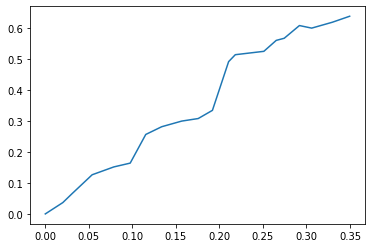

In [48]:
data = []
for i in range(0, 10_000_000, 500_000):
    data.append((timeit(f'list(range({i}))', number=1),
                 timeit(f'set(range({i}))', number=1)
                )
               )
plt.plot(*zip(*data));
print(*zip(*data))

Creating these lists and sets takes time, all the more so that their size is larger. For a given large enough size, creating a list and creating a set do not take the same time. When estimating operations on lists or sets, we want to measure the time it takes to apply that operation to the list or set, without including the extra time needed to create them. When comparing the performance of a given operation on a list versus that same operation on a set, it is even more important not to take into account the time needed to create them, since as observed, that time differs.   The `setup` argument of the `timeit()` function allows us to execute some statements prior to executing the statements whose running time we want to estimate.

Retrieving, in a list of size 10 million, the element whose index is a multiple of 500,000, does not significantly depend on the value of the index. As that operation is so efficient, we perform it 10 million times to make the evaluation more precise:

In [ ]:
data = []
for i in range(0, 10_000_000, 500_000):
    data.append((i, timeit(f'L[{i}]', setup='L = [None] * 10_000_000',
                           number=10_000_000
                          )
                )
               )
plt.plot(*zip(*data));

The next experiment consists in popping, in a list of size 10 thousand, the element whose index is a multiple of 500. The operation is performed 100,000 times, again to make the evaluation more precise, but the setup code is executed only once, so after each call to `pop()`, we append an element to the end of the list so as to maintain its size. The smaller the index is, that is, the closer the element being popped is to the beginning of the list, the larger is the number of elements that have to be "shifted" from right to left to fill the vacancy left by that element:

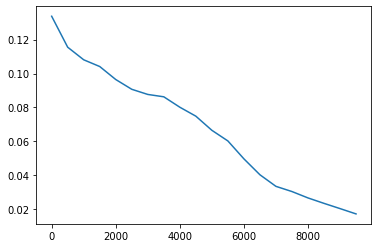

In [39]:
data = []
for i in range(0, 10_000, 500):
    data.append((i, timeit(f'L.pop({i}); L.append(None)',
                           setup='L = [None] * 10_000', number=100_000
                          )
                )
               )
plt.plot(*zip(*data));

The next experiment consists in removing, in a list of size 14,500, an element (0), whose first occurrence has an index that is a multiple of 500, up to and including 9,500. The operation is performed 5,000 times, again to make the evaluation more precise; we again append an element to the end of the list so as to maintain its size. The cost of finding an element $e$ that is further and further away from the beginning of the list increases more than the cost of "shifting" fewer and fewer elements from right to left to fill the vacancy left by removing $e$ decreases:

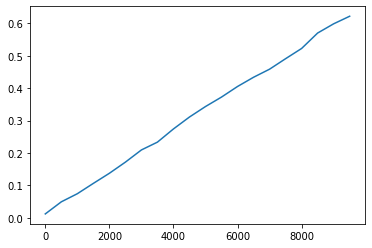

In [40]:
data = []
for i in range(0, 10_000, 500):
    data.append((i, timeit('L.remove(0); L.append(None)',
                           setup=f'L = [None] * {i} + [0] * (14_500 - {i})',
                           number=5_000
                          )
                )
               )
plt.plot(*zip(*data));

The next experiment consists in removing, in the set of all numbers between 0 included and 10 thousand excluded, the multiples of 500. The operation is performed 1,000,000 times, again to make the evaluation more precise; right after we have removed an element from the set, we bring it back. We see the benefit of working with sets rather than lists, when we can afford it, when we often need to remove elements:

[(0, 0.21610703099986495), (500, 0.1341489729998102), (1000, 0.13282579299993813), (1500, 0.14466412199999468), (2000, 0.11437720200001422), (2500, 0.114413169999807), (3000, 0.11429576599994107), (3500, 0.11428384400005598), (4000, 0.11470930699988457), (4500, 0.11422254399985832), (5000, 0.11451145199998791), (5500, 0.1175533489999907), (6000, 0.11456643500014252), (6500, 0.11402427500024714), (7000, 0.12751209199996083), (7500, 0.126669659000072), (8000, 0.13902427499988335), (8500, 0.11664571999972395), (9000, 0.11509574999990946), (9500, 0.11652309700002661)]


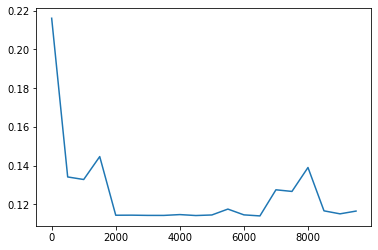

In [45]:
data = []
for i in range(0, 10_000, 500):
    data.append((i, timeit(f'S.remove({i}); S.add({i})',
                           setup='S = set(range(10_000))', number=1_000_000
                          )
                )
               )
print(data)
plt.plot(*zip(*data));

So though Euler's sieve sounded as a good idea and a possible improvement over Eratosthenes' sieve, it turned out to perform much worse because often applying the `remove()` method to a list is not efficient: it is on average linear in the length of the list. But applying the `remove()` method to a set is efficient: it has constant complexity. This suggests to, at every stage when all proper multiples of a (prime) number $p$ have to be eliminated, convert the list of numbers that are still left to a set, remove those multiples from the set, and then convert the resulting set back to a list. Sorting is costly, but being performed only as many times as there are prime numbers smaller than $\lfloor\sqrt n\rfloor$, it could still bring an improvement.

Also, that allows one to get back to the original idea of eliminating all proper multiples at most equal to $n$ of a given prime number $p$ that are not multiples of smaller prime numbers by multiplying $p$ with all numbers at least equal to $p$ in `sieve`, until the product exceeds $n$. The approach is flawed if numbers are eliminated from `sieve`, but it is valid if numbers are eliminated from a copy of `sieve` as a set. To demonstrate it, we define a new version of `eliminate_proper_multiples_from_set()` that makes use of a `global` __declaration__, a notion that we now introduce.

The value of a global variable can be accessed from within a function:

In [35]:
a = 1

def f():
    print(a)

f()
a

1


1

A function can define a local variable with the same name as a global variable, the former then hiding the latter within the function:

In [36]:
a = 1

def f():
    a = 2
    print(a)
    
f()
a

2


1

A function can change the value of a global variable. It cannot then define a local variable with the same name, and the global variable has to be declared as `global` within the function:

In [37]:
a = 1

def f():
    global a
    print(a)
    a = 2
    
f()
a

1


2

In the following code fragment, the assignment of `2` to `a` makes `a` a __local__ variable of the function `f()`. Within a function, a variable is either global (the `global` declaration being necessary if and only if the function has a statement that assigns some value to that variable) or local; it is not global in parts of the function, and local in other parts. And since one cannot get the value of a variable before that variable has been assigned a value, the definition of `f()` below is incorrect:

In [38]:
a = 1

def f():
    print(a)
    a = 2

f()

UnboundLocalError: local variable 'a' referenced before assignment

Now, to observe how, with `n` set to `25`, proper multiples of 2, proper multiples of 3 that are not multiples of 2, and proper multiples of 5, equal to $\lfloor\sqrt 25\rfloor$, that are multiples of neither 2 nor 3, are eliminated, we successively call the following function with `i` set to `0`, `1` and `2` as argument:

In [ ]:
def eliminate_proper_multiples_from_set(i):
    # We assume that this function will be called in the order
    #   eliminate_proper_multiples(0)
    #   eliminate_proper_multiples(1)
    #   eliminate_proper_multiples(2)
    #   ...
    global sieve
    sieve_as_set = set(sieve)
    print(f'Now eliminating proper multiples of {sieve[i]}')
    j = i
    while j < len(sieve):
        factor = sieve[i] * sieve[j]
        if factor <= n:
            print(f' Eliminating {sieve[i]} * {sieve[j]} = {factor}')
            sieve_as_set.remove(factor)
            j += 1
        else:
            break
    sieve = sorted(sieve_as_set)

In [ ]:
sieve = list(range(2, n + 1))
print_sieve_contents()

In [ ]:
eliminate_proper_multiples_from_set(0)
print_sieve_contents()

In [ ]:
eliminate_proper_multiples_from_set(1)
print_sieve_contents()

In [ ]:
eliminate_proper_multiples_from_set(2)
print_sieve_contents()

Putting it all together:

In [ ]:
def second_sieve_of_primes_up_to(n):
    sieve = list(range(2, n + 1))
    i = 0
    while sieve[i] <= round(sqrt(n)):
        sieve_as_set = set(sieve)
        k = 0
        while True:
            factor = sieve[i] * sieve[i + k]
            if factor > n:
                break
            sieve_as_set.remove(factor)
            k += 1
        sieve = sorted(sieve_as_set)
        i += 1
    return sieve

In [ ]:
primes = second_sieve_of_primes_up_to(1_000)
nicely_display(primes, len(str(primes[-1])))

This second version of Euler's sieve is indeed more efficient than the first version, but it is still less efficient than Eratosthenes' sieve:

In [ ]:
timeit('second_sieve_of_primes_up_to(500_000)', globals=globals(), number=1)